<a href="https://colab.research.google.com/github/SeunghyeJeon/DH-100-Project/blob/master/DH_100_Seunghye_Jeon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DIGHUM 100 Theory and Methods, Summer 2021
# Instructor: Adam Anderson | Student: Seunghye Jeon

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **What's Driving the Vegan Trend?**

> Humans are omnivores, and animal meat provides many
nutrients that humans need that are not available in plant
sources (Bhat 2010, 125). According to Bhat, "[m]eat is
specifically valuable as a source of omega-3 fatty acids,
vitamin B12, protein and highly bioavailable iron (Bhat 2010,
125)." Therefore, meat is a significant food source for human
which helps to keep better physical and mental health, and the
demand for the meat is keep increasing. However, the
increased meat production and consumption also has some
adverse effects on the environment and human health. Since
the environmental problems caused by the meat production is
coming up as an issue nowadays, many people are trying to
organize their diet with plant-based ingredients instead of
animal meat. In this project, I would like to identify the effect of
meat comsumption to the environment and human health and
the current trend of vegetarianism.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import io
import seaborn as sns

## **Environment Impact of Meat Production**

In [18]:
food_production_df = pd.read_csv("/content/drive/MyDrive/Dighum100/Food_Production.csv")
food_production_df = food_production_df.fillna('')
food_production_df

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,,,,,,,,,,,,,,
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,,,,,,,,,,,,,,
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,,,,,,,,,,,,,,
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.28136,11.23,8.63846,183.912,371.077,482.4,0.945482,1.90769,2.89745,7.6,5.84615,18786.2,14450.9,7162.1
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.51438,35.07,49.3944,609.984,3166.76,2248.4,1.20727,6.26761,0.759631,2.8,3.94366,49576.3,69825.8,13449.9
5,Potatoes,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,4.7541,3.48,20.4706,80.7377,347.647,59.1,0.628415,2.70588,1.20219,0.88,5.17647,2754.2,16201.2,3762.57
6,Cassava,0.6,0.0,0.2,0.0,0.1,0.0,0.0,0.9,0.708419,0.69,7.66667,,,0,1.35524,14.6667,1.85832,1.81,20.1111,0,,
7,Cane Sugar,1.2,0.0,0.5,0.0,0.8,0.1,0.0,2.6,4.82051,16.92,,176.667,,620.1,0.911681,,0.581197,2.04,,16438.6,,4683.36
8,Beet Sugar,0.0,0.0,0.5,0.2,0.6,0.1,0.0,1.4,1.54131,5.41,,62.0228,,217.7,0.51567,,0.521368,1.83,,9493.3,,2704.64
9,Other Pulses,0.0,0.0,1.1,0.0,0.1,0.4,0.0,1.6,5.0088,17.08,7.97758,,203.503,435.7,0.524927,0.836058,4.56598,15.57,7.2723,22477.4,10498.6,


Text(0.5, 1.0, 'Food Production and the Total Emissions')

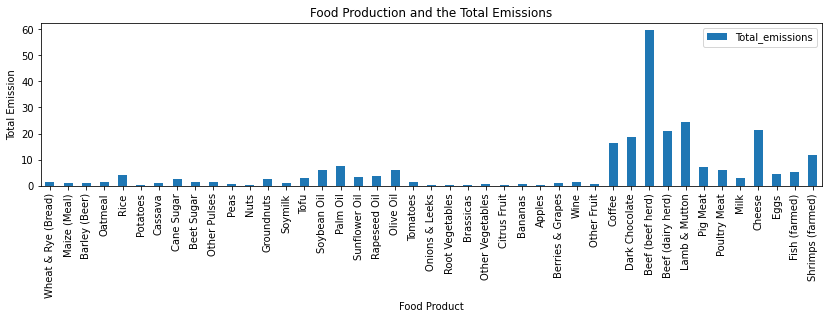

In [19]:
food_production_df.plot.bar(x='Food product', y='Total_emissions', figsize=(14,3))
plt.xlabel("Food Product")
plt.ylabel("Total Emission")
plt.title("Food Production and the Total Emissions")

In [20]:
meat_production_df = food_production_df.loc[33:37, :]
meat_production_df

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
33,Beef (beef herd),16.3,1.9,39.4,1.3,0.3,0.2,0.2,59.6,110.407,301.41,151.158,531.575,727.783,1451.2,36.4396,49.8897,119.491,326.21,163.596,34732.5,17418.5,12722.5
34,Beef (dairy herd),0.9,2.5,15.7,1.1,0.4,0.3,0.2,21.1,133.806,365.29,185.051,994.249,1375.03,2714.3,12.1978,16.8693,15.8388,43.24,21.9048,119805,60691.6,43884.7
35,Lamb & Mutton,0.5,2.4,19.5,1.1,0.5,0.3,0.2,24.5,30.6404,97.13,48.5407,568.707,900.95,1802.8,12.53,19.8501,116.659,369.81,184.813,141925,70927,44771.3
36,Pig Meat,1.5,2.9,1.7,0.3,0.3,0.3,0.2,7.2,31.9582,76.38,47.2064,751.381,1109.89,1795.8,5.15063,7.60816,7.2636,17.36,10.7293,66867.4,41327.2,27978
37,Poultry Meat,2.5,1.8,0.7,0.4,0.3,0.2,0.2,6.1,26.3243,48.7,28.1178,356.757,381.062,660,5.33514,5.69861,6.60541,12.22,7.05543,14177.9,8185.85,7663.73


Text(0.5, 1.0, 'Meat Production and the Total Emissions')

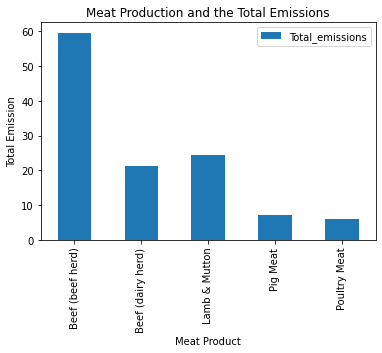

In [21]:
meat_production_df.plot.bar(x='Food product', y='Total_emissions')
plt.xlabel("Meat Product")
plt.ylabel("Total Emission")
plt.title("Meat Production and the Total Emissions")

## **Human Health Impact of Meat Consumption**

In [22]:
meat_consumption_df = pd.read_csv("/content/drive/MyDrive/Dighum100/Meat consumption.csv")
meat_consumption_df

,Country,Meat consumption,ISO-code
0,Afghanistan,17.3,AFG
1,Algeria,18.3,DZA
2,American Samoa,24.9,ASM
3,Angola,19.0,AGO
4,Antigua and Barbuda,56.0,ATG
...,...,...,...
182,Vietnam,28.6,VNM
183,Virgin Islands,6.6,VIR
184,Yemen,14.7,YEM
185,Zambia,11.9,ZMB


In [23]:
life_expectancy_df = pd.read_csv("/content/drive/MyDrive/Dighum100/Life expectancy.csv")
life_expectancy_df

,Country,Life expectancy,ISO-code
0,Afghanistan,64.5,AFG
1,Algeria,76.7,DZA
2,Andorra,81.8,AND
3,Angola,60.8,AGO
4,Antigua and Barbuda,76.9,ATG
...,...,...,...
180,Venezuela,72.1,VEN
181,Vietnam,75.3,VNM
182,Yemen,66.1,YEM
183,Zambia,63.5,ZMB


In [24]:
meat_consumption_and_life_expectancy = pd.merge(meat_consumption_df, life_expectancy_df)
meat_consumption_and_life_expectancy

,Country,Meat consumption,ISO-code,Life expectancy
0,Afghanistan,17.3,AFG,64.5
1,Algeria,18.3,DZA,76.7
2,Angola,19.0,AGO,60.8
3,Antigua and Barbuda,56.0,ATG,76.9
4,Argentina,79.7,ARG,76.5
...,...,...,...,...
169,Venezuela,56.6,VEN,72.1
170,Vietnam,28.6,VNM,75.3
171,Yemen,14.7,YEM,66.1
172,Zambia,11.9,ZMB,63.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Meat Consumption and Life Expectancy')

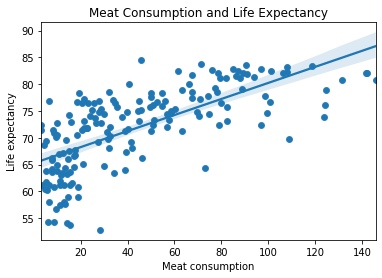

In [25]:
meat_consumption_and_life_expectancy.plot(kind='scatter', x='Meat consumption', y='Life expectancy')
sns.regplot(meat_consumption_and_life_expectancy['Meat consumption'],meat_consumption_and_life_expectancy['Life expectancy'])
plt.title('Meat Consumption and Life Expectancy')

## **Current Trend and Movement of Vegetarianism**

In [26]:
vegan_restaurants_df = pd.read_csv("/content/drive/MyDrive/Dighum100/Datafiniti_Vegetarian_and_Vegan_Restaurants.csv")
vegan_restaurants_df = vegan_restaurants_df.fillna('')
vegan_restaurants_df

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,claimed,country,cuisines,descriptions.dateSeen,descriptions.sourceURLs,descriptions.value,facebookPageURL,features.key,features.value,hours.day,hours.dept,hours.hour,imageURLs,isClosed,keys,languagesSpoken,latitude,longitude,menuPageURL,menus.amountMax,menus.amountMin,menus.category,menus.currency,menus.dateSeen,menus.description,menus.name,menus.sourceURLs,name,paymentTypes,phones,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province,sic,sourceURLs,twitter,websites,yearOpened
0,AVwd3yXEkufWRAb59-sH,2016-04-22T02:47:48Z,2018-09-10T21:00:49Z,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",Accommodation & Food Services,Albany,,US,"Thai,Asian/Pacific,Vegetarian",,,,,,,,,,https://igx.4sqi.net/img/general/600x600/o_h1i...,,us/ca/albany/1045sanpabloave/-1106202297,,37.885131,-122.297013,http://www.singlepage.com/ruen-pair-authentic-...,13.95,3.75,,USD,2016-04-22T02:48:00.000Z,"Squash, carrots, butternut squash and potato",Baked Kabocha,https://foursquare.com/v/potala-organic-cafe/4...,Potala Organic Cafe,,(510) 528-2375,94706,,,,CA,,https://foursquare.com/v/potala-organic-cafe/4...,,"http://www.potala.us/,http://potala.us",
1,AVwd3yXEkufWRAb59-sH,2016-04-22T02:47:48Z,2018-09-10T21:00:49Z,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",Accommodation & Food Services,Albany,,US,"Thai,Asian/Pacific,Vegetarian",,,,,,,,,,https://igx.4sqi.net/img/general/600x600/o_h1i...,,us/ca/albany/1045sanpabloave/-1106202297,,37.885131,-122.297013,http://www.singlepage.com/ruen-pair-authentic-...,13.95,3.75,,USD,2016-04-22T02:48:00.000Z,With wild blend brown rice,Short Grain Brown Rice,https://foursquare.com/v/potala-organic-cafe/4...,Potala Organic Cafe,,(510) 528-2375,94706,,,,CA,,https://foursquare.com/v/potala-organic-cafe/4...,,"http://www.potala.us/,http://potala.us",
2,AVwd3yXEkufWRAb59-sH,2016-04-22T02:47:48Z,2018-09-10T21:00:49Z,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",Accommodation & Food Services,Albany,,US,"Thai,Asian/Pacific,Vegetarian",,,,,,,,,,https://igx.4sqi.net/img/general/600x600/o_h1i...,,us/ca/albany/1045sanpabloave/-1106202297,,37.885131,-122.297013,http://www.singlepage.com/ruen-pair-authentic-...,13.95,3.75,,USD,2016-04-22T02:48:00.000Z,,Green Bean Veggie Soup,https://foursquare.com/v/potala-organic-cafe/4...,Potala Organic Cafe,,(510) 528-2375,94706,,,,CA,,https://foursquare.com/v/potala-organic-cafe/4...,,"http://www.potala.us/,http://potala.us",
3,AVwd3yXEkufWRAb59-sH,2016-04-22T02:47:48Z,2018-09-10T21:00:49Z,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",Accommodation & Food Services,Albany,,US,"Thai,Asian/Pacific,Vegetarian",,,,,,,,,,https://igx.4sqi.net/img/general/600x600/o_h1i...,,us/ca/albany/1045sanpabloave/-1106202297,,37.885131,-122.297013,http://www.singlepage.com/ruen-pair-authentic-...,8.95,8.95,,USD,2016-04-22T02:48:00.000Z,,"Steamed Broccoli, Carrots and Turnips",https://foursquare.com/v/potala-organic-cafe/4...,Potala Organic Cafe,,(510) 528-2375,94706,,,,CA,,https://foursquare.com/v/potala-organic-cafe/4...,,"http://www.potala.us/,http://potala.us",
4,AVwd3yXEkufWRAb59-sH,2016-04-22T02:47:48Z,2018-09-10T21:00:49Z,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",Accommodation & Food Services,Albany,,US,"Thai,Asian/Pacific,Vegetarian",,,,,,,,,,https://igx.4sqi.net/img/general/600x600/o_h1i...,,us/ca/albany/1045sanpabloave/-1106202297,,37.885131,-122.297013,http://www.singlepage.com/ruen-pair-authentic-...,13.95,3.75,,USD,2016-04-22T02:48:00.000Z,With vinegar tahini beet dressing,Mixed Green Salad,https://foursquare.com/v/potala-organic-cafe/4...,Potala Organic Cafe,,(510) 528-2375,94706,,,,CA,,https://foursquare.com/v/potala-organic-cafe/4...,,"http://www.potala.us/,http://potala.us",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [76]:
vegan_cuisines = vegan_restaurants_df.groupby("cuisines").agg("count")
vegan_cuisines = vegan_cuisines.reset_index()
vegan_cuisines = vegan_cuisines.sort_values(by=['id'], ascending=False).head(14)
vegan_cuisines = vegan_cuisines.drop([124, 47, 111, 11])
vegan_cuisines = vegan_cuisines.replace({"cuisines": {"Vegetarian,Indian": "Indian",
                                                      "Cocktails,Vegetarian,Dim Sum,Chinese": "Chinese", 
                                                      "Local/Organic,Vegan Restaurants,Smoothies and Juices,Vegetarian,Healthy": "Smoothies and Juices",
                                                      "New American,Traditional American,American,Vegetarian Friendly,Gluten Free Options,Vegan Options,Northwest, American": "American",
                                                      "Vegetarian,Salads": "Salads",
                                                      "American (New),Vegetarian,Coffee and Tea,Health Food,Vegan": "Coffee and Tea",
                                                      "Local/Organic,Smoothies and Juices,Vegetarian,Kosher,Healthy,Vegan": "Kosher",
                                                      "Vegetarian,Breakfast and Brunch": "Breakfast and Brunch",
                                                      "Italian,American,Bar,Vegetarian Friendly,Gluten Free Options,Vegan Options": "Italian",
                                                      "Greek,Seafood,Mediterranean,Vegetarian,Mediterranean Restaurants": "Mediterranean"}})
vegan_cuisines

,cuisines,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,claimed,country,descriptions.dateSeen,descriptions.sourceURLs,descriptions.value,facebookPageURL,features.key,features.value,hours.day,hours.dept,hours.hour,imageURLs,isClosed,keys,languagesSpoken,latitude,longitude,menuPageURL,menus.amountMax,menus.amountMin,menus.category,menus.currency,menus.dateSeen,menus.description,menus.name,menus.sourceURLs,name,paymentTypes,phones,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province,sic,sourceURLs,twitter,websites,yearOpened
129,Indian,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579
26,Chinese,375,375,375,375,375,375,375,375,375,375,375,375,375,375,375,375,375,375,375,375,375,375,375,375,375,375,375,375,375,375,375,375,375,375,375,375,375,375,375,375,375,375,375,375,375,375
57,Smoothies and Juices,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310
81,American,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308
140,Salads,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250
2,Coffee and Tea,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203
56,Kosher,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179
114,Breakfast and Brunch,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175
51,Italian,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173
36,Mediterranean,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168


Text(0.5, 1.0, 'Type of Vegan Restaurants')

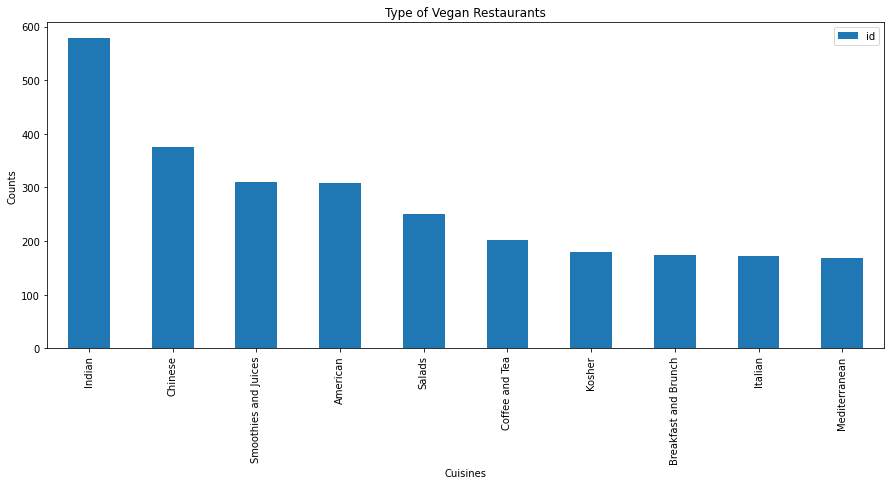

In [78]:
vegan_cuisines.plot.bar(x='cuisines', y='id', figsize=(15,6))
plt.xlabel("Cuisines")
plt.ylabel("Counts")
plt.title("Type of Vegan Restaurants")